In [9]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

img_path = "D:/Area de trabalho/Faculdade/Disciplinas/2025.2/PDI/atvd1/Felipe Cordeiro de Sousa UFC - Fig0224(galaxy_pair_original) (1).tif"

img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

# Defina o DPI desejado
dpi_desejado = 72
dpi_original = 300 

print(f"DPI original: {dpi_original}, DPI desejado: {dpi_desejado}")

h, w = img.shape
print(f"Altura original: {h}, Largura original: {w}")

DPI original: 300, DPI desejado: 72
Altura original: 598, Largura original: 566


In [10]:
# Fazendo resize da imagem para 300 dpi novamente
# Salve a imagem no formato TIFF com os parâmetros de DPI
scale_factor = dpi_desejado / dpi_original
print(f"Fator de escala: {scale_factor}")

new_w = int(w * scale_factor)
new_h = int(h * scale_factor)
new_dim = (new_w, new_h)
print(f"Novas dimensões: {new_dim}")

# Imagem redimensionada (usando interpolação vizinho mais próximo)
resized_image_nearest = cv.resize(img, (w, h), interpolation=cv.INTER_NEAREST)
# Imagem redimensionada (usando bilinear)
resized_image_bilinear = cv.resize(img, (w, h), interpolation=cv.INTER_LINEAR)
# Imagem redimensionada (usando bicúbica)
resized_image_bicubic = cv.resize(img, (w, h), interpolation=cv.INTER_CUBIC)

# Imagem restaurada ao tamanho original (usando interpolação vizinho mais próximo)
original_image_from_resized = cv.resize(resized_image_nearest, (w, h), interpolation=cv.INTER_NEAREST)
# Imagem restaurada ao tamanho original (usando bilinear)
original_image_from_resized_bilinear = cv.resize(resized_image_bilinear, (w, h), interpolation=cv.INTER_LINEAR)
# Imagem restaurada ao tamanho original (usando bicúbica)
original_image_from_resized_bicubic = cv.resize(resized_image_bicubic, (w, h), interpolation=cv.INTER_CUBIC)

cv.imwrite("results/bicubic_72dpi.tiff", original_image_from_resized_bicubic)
cv.imwrite("results/bilinear_72dpi.tiff", original_image_from_resized_bilinear)
cv.imwrite("results/nearest_72dpi.tiff", original_image_from_resized)

Fator de escala: 0.24
Novas dimensões: (135, 143)


True

In [11]:
# Fazendo resize da imagem para 300 dpi novamente
# Salve a imagem no formato TIFF com os parâmetros de DPI
dpi_desejado = 150
scale_factor = dpi_desejado / dpi_original
print(f"Fator de escala: {scale_factor}")

new_w = int(w * scale_factor)
new_h = int(h * scale_factor)
new_dim = (new_w, new_h)
print(f"Novas dimensões: {new_dim}")

# Imagem redimensionada (usando interpolação vizinho mais próximo)
resized_image_nearest = cv.resize(img, (w, h), interpolation=cv.INTER_NEAREST)
# Imagem redimensionada (usando bilinear)
resized_image_bilinear = cv.resize(img, (w, h), interpolation=cv.INTER_LINEAR)
# Imagem redimensionada (usando bicúbica)
resized_image_bicubic = cv.resize(img, (w, h), interpolation=cv.INTER_CUBIC)

# Imagem restaurada ao tamanho original (usando interpolação vizinho mais próximo)
original_image_from_resized = cv.resize(resized_image_nearest, (w, h), interpolation=cv.INTER_NEAREST)
# Imagem restaurada ao tamanho original (usando bilinear)
original_image_from_resized_bilinear = cv.resize(resized_image_bilinear, (w, h), interpolation=cv.INTER_LINEAR)
# Imagem restaurada ao tamanho original (usando bicúbica)
original_image_from_resized_bicubic = cv.resize(resized_image_bicubic, (w, h), interpolation=cv.INTER_CUBIC)

cv.imwrite("results/bicubic_150dpi.tiff", original_image_from_resized_bicubic)
cv.imwrite("results/bilinear_150dpi.tiff", original_image_from_resized_bilinear)
cv.imwrite("results/nearest_150dpi.tiff", original_image_from_resized)

Fator de escala: 0.5
Novas dimensões: (283, 299)


True

Plotagem de figuras

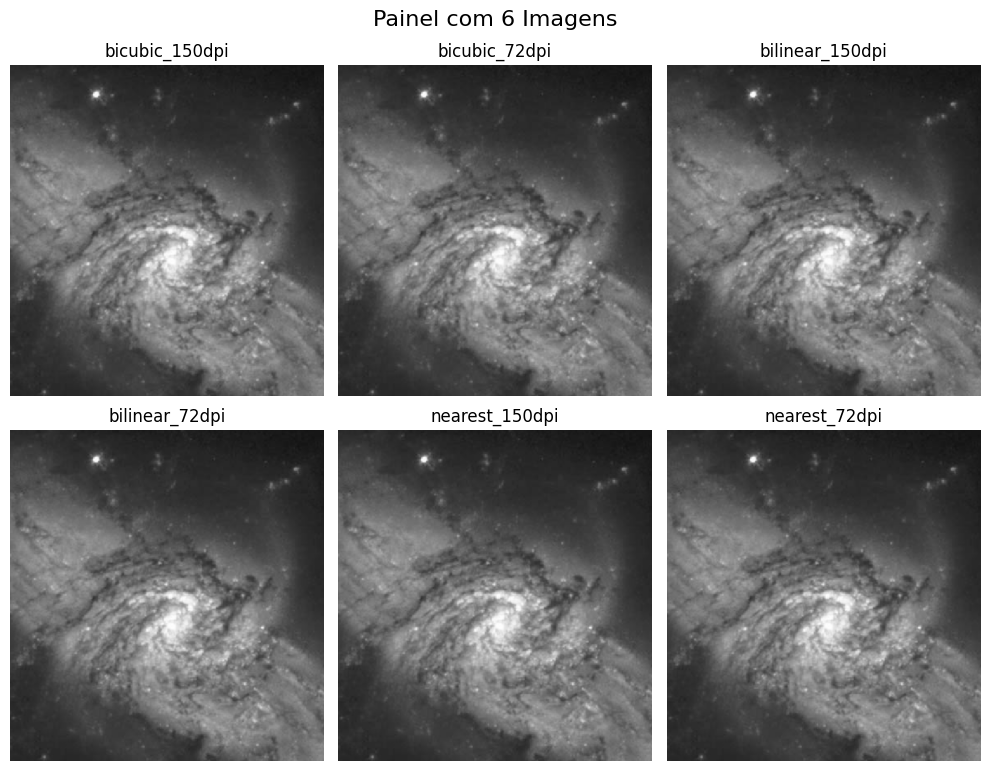

In [17]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

fig.suptitle('Painel com 6 Imagens', fontsize=16)
fig_paths = os.listdir('results/')
figures = [(fig_path.split('.')[0],cv.imread(os.path.join('results', fig_path))) for fig_path in fig_paths]

# Percorrendo os eixos e as imagens para plotar cada uma
for i, ax in enumerate(axes.flat):
    # Exibe a imagem no subplot 'ax'
    ax.imshow(figures[i][1])
    
    # Adiciona um título a cada subplot
    ax.set_title(f'{figures[i][0]}', fontsize=12)
    
    # Desliga os eixos (números e marcações) para uma visualização mais limpa
    ax.axis('off')

fig.tight_layout()
plt.savefig('results/painel_figures.tiff', dpi=300)
plt.show()